In [37]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

In [38]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [39]:
img, label = mnist.train.next_batch(10)

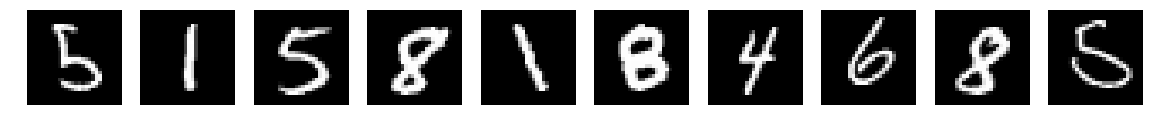

In [40]:
dim = 28

fig, axs = plt.subplots(1, len(img), figsize=(20, 3))
for i, (img, label )in enumerate(zip(img, label)):  
        axs[i].imshow(np.reshape(img, (dim, dim)),cmap='gray')
        axs[i].axis('off')
plt.show()

In [41]:
class CNN:
    def __init__(self):
        with tf.name_scope("input"):
            self.x = tf.placeholder(tf.float32, shape=[None, dim*dim])
            self.y = tf.placeholder(tf.float32, shape=[None, 10])

        with tf.name_scope("input_reshape"):
            x_image = tf.reshape(self.x, [-1, dim, dim, 1])

        with tf.name_scope("conv_1"):
            filt = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.01))
            conv = tf.nn.conv2d(x_image, filt, strides=[1,1,1,1], padding="SAME")
            b = tf.Variable(tf.constant(0.1, shape=[32]))
            h = tf.nn.bias_add(conv, b)
            h_act_1 = tf.nn.relu(h)

        with tf.name_scope("pool_1"):
            h_pool_1 = tf.nn.max_pool(h_act_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")

        with tf.name_scope("conv_2"): 
            filt = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.01))
            conv = tf.nn.conv2d(h_pool_1, filt, strides=[1,1,1,1], padding='SAME')
            b = tf.Variable(tf.constant(0.1, shape=[64]))
            h = tf.nn.bias_add(conv, b)
            h_act_2 = tf.nn.relu(h)

        with tf.name_scope("pool_2"):
            h_pool_2 = h_pool_1 = tf.nn.max_pool(h_act_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")

        with tf.name_scope("flatten"):
            h_dim = int(h_pool_2.shape[1] * h_pool_2.shape[2] * h_pool_2.shape[3])
            h_flatten = tf.reshape(h_pool_2, [-1, h_dim])

        with tf.name_scope("fc_1"):
            W = tf.Variable(tf.truncated_normal([h_dim, 1024], stddev=0.01))
            b = tf.Variable(tf.constant(0.1, shape=[1024]))
            h = tf.nn.bias_add(tf.matmul(h_flatten, W), b)
            h_act_3 = tf.nn.relu(h) 
               
        with tf.name_scope("fc_2"):
            W = tf.Variable(tf.truncated_normal([h_dim, 10], stddev=0.01))
            b = tf.Variable(tf.constant(0.1, shape=[10]))
            output = tf.nn.bias_add(tf.matmul(h_flatten, W), b)
                    
        with tf.name_scope("loss"):
            self.loss = tf.reduce_mean(
                tf.nn.softmax_cross_entropy_with_logits(labels=self.y, logits=output))

        with tf.name_scope("accuracy"):
            correct = tf.equal(tf.argmax(output, 1), tf.argmax(self.y, 1))
            self.accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))


In [46]:
n_iter = 1000
batch_size = 50

In [47]:
with tf.Session() as sess:
    cnn = CNN()
    opt = tf.train.AdamOptimizer(1e-4).minimize(cnn.loss)
    
    sess.run(tf.global_variables_initializer())

    for i in tqdm(range(n_iter)):
        batch = mnist.train.next_batch(batch_size)
        _ = sess.run(opt, feed_dict={cnn.x: batch[0], cnn.y: batch[1]})
        
        if i % 100 == 0:
            train_loss, train_accuracy = sess.run([cnn.loss, cnn.accuracy], feed_dict={cnn.x: batch[0], cnn.y: batch[1]})
            print('step %d, training loss %g, training accuracy %g' % (i, train_loss, train_accuracy))
        
    test_accuracy = sess.run(cnn.accuracy, feed_dict={cnn.x: mnist.test.images, cnn.y: mnist.test.labels})
    print('test accuracy %g' % test_accuracy)

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

step 0, training loss 2.28539, training accuracy 0.16
step 100, training loss 2.2638, training accuracy 0.2
step 200, training loss 0.796172, training accuracy 0.86
step 300, training loss 0.570989, training accuracy 0.78
step 400, training loss 0.308688, training accuracy 0.94
step 500, training loss 0.269762, training accuracy 0.92
step 600, training loss 0.447148, training accuracy 0.86
step 700, training loss 0.452913, training accuracy 0.88
step 800, training loss 0.231707, training accuracy 0.92
step 900, training loss 0.336828, training accuracy 0.9

test accuracy 0.9284
